In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import traceback
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [34]:
data_AF = pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\Asiana Airlines Inc. Freight.xlsx', index_col=0)
data_AP = pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\Asiana Airlines Inc. Passenger.xlsx', index_col=0)
data_DF = pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\Delta Air Lines Inc. Freight.xlsx', index_col=0)
data_DP = pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\Delta Air Lines Inc. Passenger.xlsx', index_col=0)
data_KF = pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\Korean Air Lines Co. Ltd. Freight.xlsx', index_col=0)
data_KP = pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\Korean Air Lines Co. Ltd. Passenger.xlsx', index_col=0)
data_CF = pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\Cathay Pacific Airways Ltd. Freight.xlsx', index_col=0)
data_CP = pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\Cathay Pacific Airways Ltd. Passenger.xlsx', index_col=0)
data_EF = pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\Eva Airways Corporation Freight.xlsx', index_col=0)
data_EP = pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\Eva Airways Corporation Passenger.xlsx', index_col=0)
data_LF = pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\Lufthansa German Airlines Freight.xlsx', index_col=0)
data_LP = pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\Lufthansa German Airlines Passenger.xlsx', index_col=0)

In [35]:
data_A = data_AF
data_A['Passenger'] = data_AP['Passenger'].values
data_D = data_DF
data_D['Passenger'] = data_DP['Passenger'].values
data_K = data_KF
data_K['Passenger'] = data_KP['Passenger'].values
data_C = data_CF
data_C['Passenger'] = data_CP['Passenger'].values
data_E = data_EF
data_E['Passenger'] = data_EP['Passenger'].values
data_L = data_LF
data_L['Passenger'] = data_LP['Passenger'].values
data = [data_A,data_D,data_K,data_C, data_E, data_L]
for i in range(len(data)):
    data[i]['Wprice'] = data[i]['Price']/data[i]['Price'].mean()
    data[i]['WFreight'] = data[i]['Freight']/data[i]['Freight'].mean()
    data[i]['WPassenger'] = data[i]['Passenger']/data[i]['Passenger'].mean()
    data[i]['datetime'] = pd.to_datetime(data[i].index.values)

In [36]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100,colors = 'color'):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color=colors)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(np.arange(0,len(x),step = 30),x[np.arange(0,len(x),step = 30)])
    plt.show()

In [37]:
len(data[0])+len(data[1])+len(data[2])+len(data[3])+len(data[4])+len(data[5])

922

In [38]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189 entries, 2003-09-25 to 2019-06-25
Data columns (total 7 columns):
Price         189 non-null int64
Freight       189 non-null float64
Passenger     189 non-null float64
Wprice        189 non-null float64
WFreight      189 non-null float64
WPassenger    189 non-null float64
datetime      189 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 11.8 KB


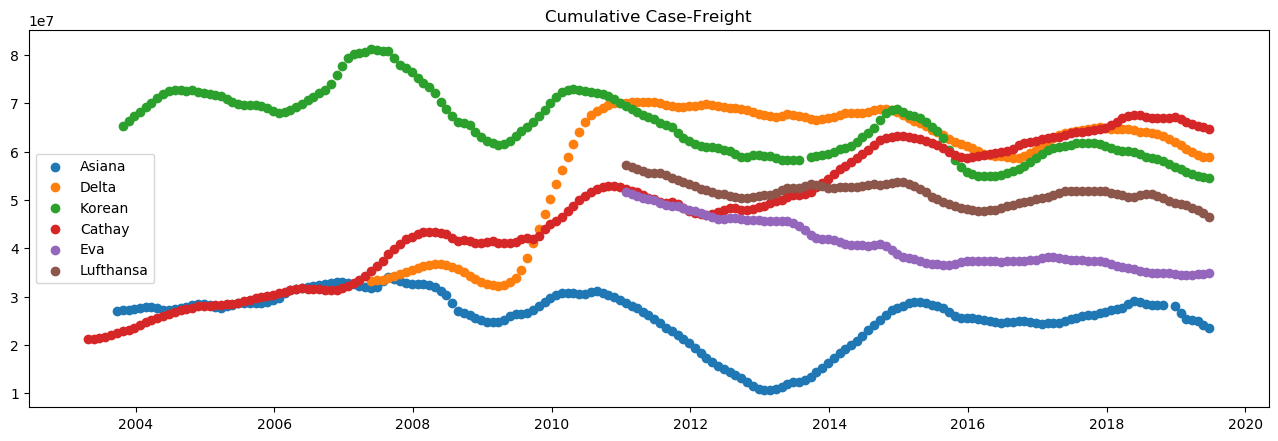

In [39]:
what = 'Freight'
plt.figure(figsize=(16,5), dpi=100)
plt.scatter(data[0]['datetime'].values, data[0][what], label = 'Asiana')
plt.scatter(data[1]['datetime'].values, data[1][what], label = 'Delta')
plt.scatter(data[2]['datetime'].values, data[2][what], label = 'Korean')
plt.scatter(data[3]['datetime'].values, data[3][what], label = 'Cathay')
plt.scatter(data[4]['datetime'].values, data[4][what], label = 'Eva')
plt.scatter(data[5]['datetime'].values, data[5][what], label = 'Lufthansa')
plt.gca().set(title='Cumulative Case-Freight')
plt.legend()
plt.show()

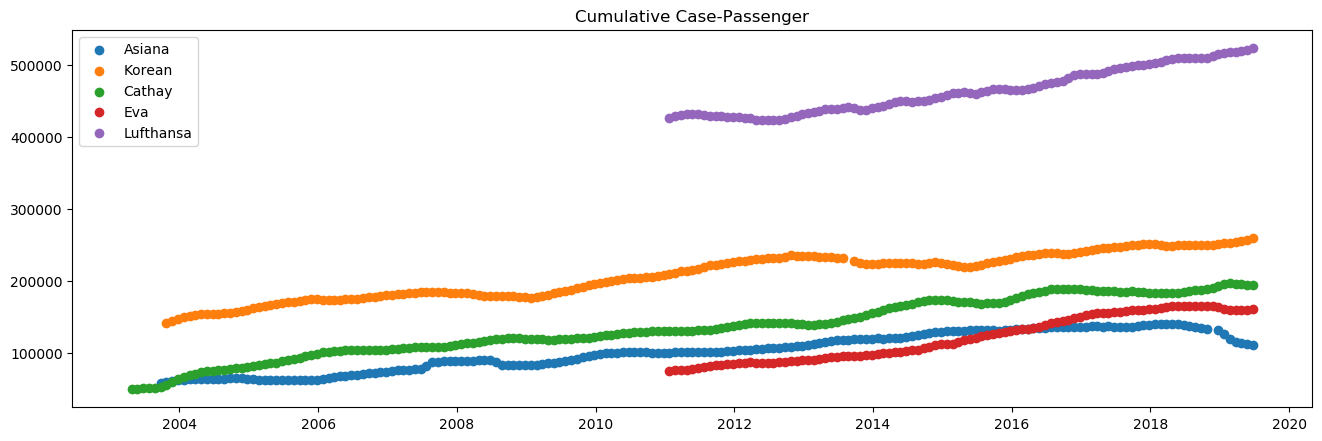

In [40]:
what = 'Passenger'
plt.figure(figsize=(16,5), dpi=100)
plt.scatter(data[0]['datetime'].values, data[0][what], label = 'Asiana')
#plt.scatter(data[1]['datetime'].values, data[1][what], label = 'Delta')
plt.scatter(data[2]['datetime'].values, data[2][what], label = 'Korean')
plt.scatter(data[3]['datetime'].values, data[3][what], label = 'Cathay')
plt.scatter(data[4]['datetime'].values, data[4][what], label = 'Eva')
plt.scatter(data[5]['datetime'].values, data[5][what], label = 'Lufthansa')
plt.gca().set(title='Cumulative Case-Passenger')
plt.legend()
plt.show()

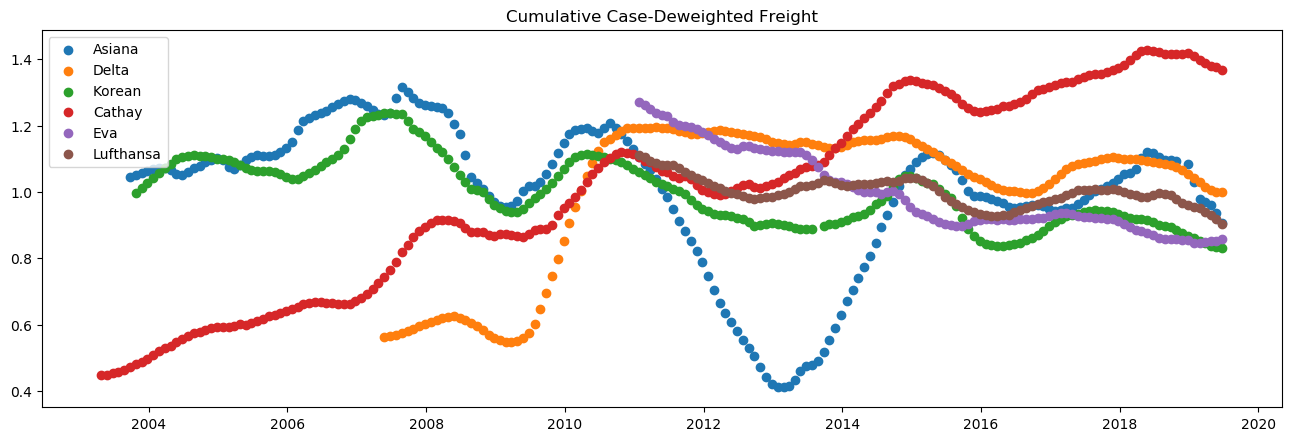

In [41]:
what = 'WFreight'
plt.figure(figsize=(16,5), dpi=100)
plt.scatter(data[0]['datetime'].values, data[0][what], label = 'Asiana')
plt.scatter(data[1]['datetime'].values, data[1][what], label = 'Delta')
plt.scatter(data[2]['datetime'].values, data[2][what], label = 'Korean')
plt.scatter(data[3]['datetime'].values, data[3][what], label = 'Cathay')
plt.scatter(data[4]['datetime'].values, data[4][what], label = 'Eva')
plt.scatter(data[5]['datetime'].values, data[5][what], label = 'Lufthansa')
plt.gca().set(title='Cumulative Case-Deweighted Freight')
plt.legend()
plt.show()

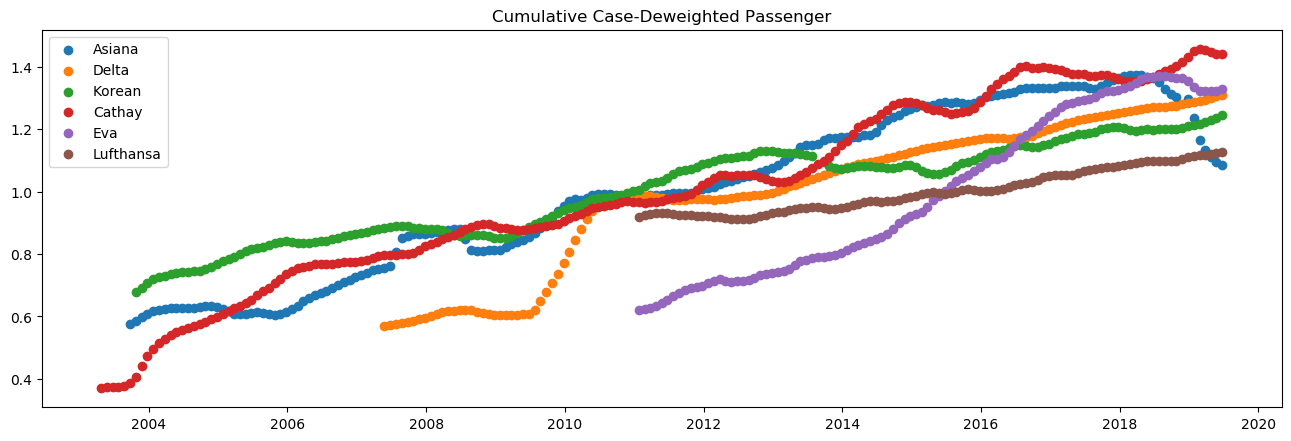

In [42]:
what = 'WPassenger'
plt.figure(figsize=(16,5), dpi=100)
plt.scatter(data[0]['datetime'].values, data[0][what], label = 'Asiana')
plt.scatter(data[1]['datetime'].values, data[1][what], label = 'Delta')
plt.scatter(data[2]['datetime'].values, data[2][what], label = 'Korean')
plt.scatter(data[3]['datetime'].values, data[3][what], label = 'Cathay')
plt.scatter(data[4]['datetime'].values, data[4][what], label = 'Eva')
plt.scatter(data[5]['datetime'].values, data[5][what], label = 'Lufthansa')
plt.gca().set(title='Cumulative Case-Deweighted Passenger')
plt.legend()
plt.show()

In [43]:
for i in range(4):
    if i == 0:
        WFreight_all = data[i]['WFreight'].values
        WPassenger_all = data[i]['WPassenger'].values
        WPrice_all = data[i]['Wprice'].values
    else:
        WFreight_all = np.concatenate((WFreight_all,data[i]['WFreight'].values))
        WPassenger_all = np.concatenate((WPassenger_all,data[i]['WPassenger'].values))
        WPrice_all = np.concatenate((WPrice_all,data[i]['Wprice'].values))

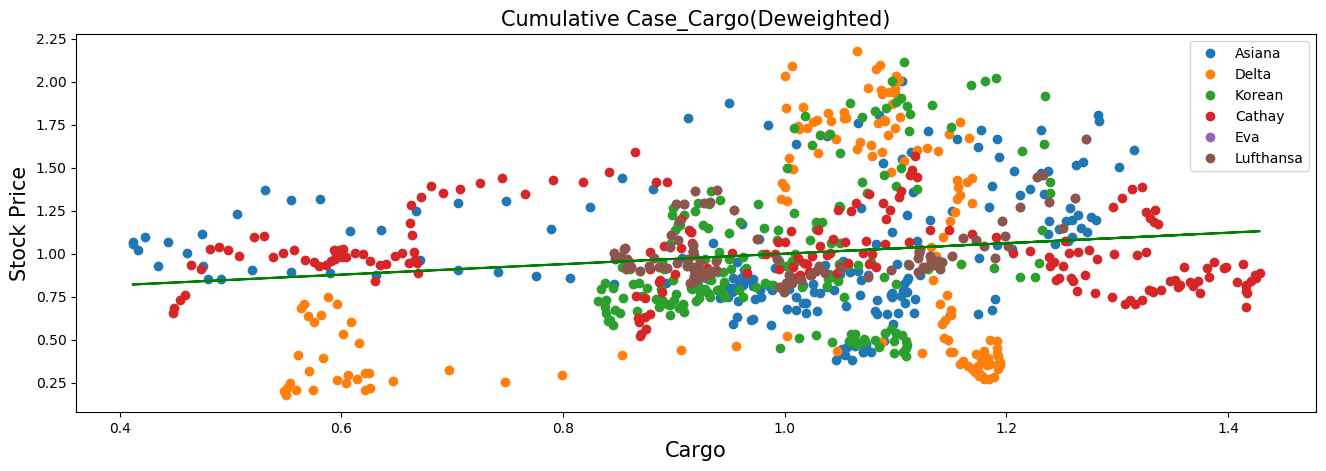

In [44]:
line = LinearRegression()
y_value = WPrice_all
x_value = WFreight_all
line.fit(x_value.reshape(-1,1),y_value)
plt.figure(figsize=(16,5), dpi=100)
plt.plot(data[0]['WFreight'].values, data[0]['Wprice'].values, 'o',label = 'Asiana')
plt.plot(data[1]['WFreight'].values, data[1]['Wprice'].values, 'o',label = 'Delta')
plt.plot(data[2]['WFreight'].values, data[2]['Wprice'].values, 'o', label = 'Korean')
plt.plot(data[3]['WFreight'].values, data[3]['Wprice'].values, 'o', label = 'Cathay')
plt.plot(data[4]['WFreight'].values, data[4]['Wprice'].values, 'o', label = 'Eva')
plt.plot(data[4]['WFreight'].values, data[4]['Wprice'].values, 'o', label = 'Lufthansa')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('Cumulative Case_Cargo(Deweighted)', fontsize = 15)
plt.xlabel('Cargo', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.legend()
plt.show()

In [45]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     18.35
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           2.08e-05
Time:                        00:12:25   Log-Likelihood:                -386.51
No. Observations:                 718   AIC:                             777.0
Df Residuals:                     716   BIC:                             786.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6952      0.073      9.546      0.000       0.552       0.838
x1             0.3048      0.071      4.284      0.000       0.165       0.445
==============================================================================
Omnibus:                       27.716   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.097
Skew:                           0.471   Prob(JB):                     4.80e-07
Kurtosis:                       2.706   Cond. No.                         9.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

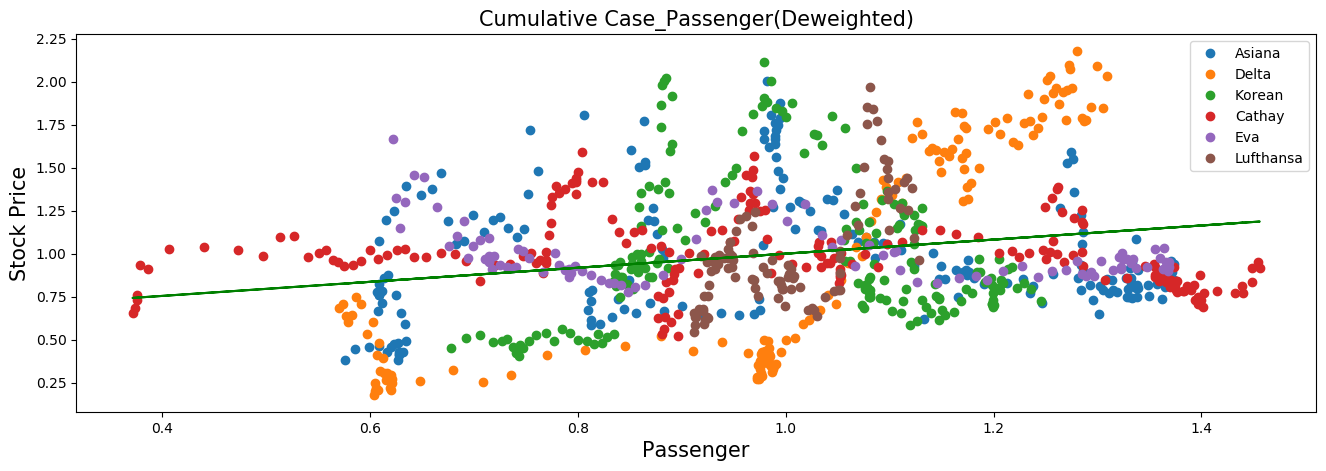

In [46]:
line = LinearRegression()
y_value = WPrice_all
x_value = WPassenger_all
line.fit(x_value.reshape(-1,1),y_value)
plt.figure(figsize=(16,5), dpi=100)
plt.plot(data[0]['WPassenger'].values, data[0]['Wprice'].values, 'o',label = 'Asiana')
plt.plot(data[1]['WPassenger'].values, data[1]['Wprice'].values, 'o',label = 'Delta')
plt.plot(data[2]['WPassenger'].values, data[2]['Wprice'].values, 'o', label = 'Korean')
plt.plot(data[3]['WPassenger'].values, data[3]['Wprice'].values, 'o', label = 'Cathay')
plt.plot(data[4]['WPassenger'].values, data[4]['Wprice'].values, 'o', label = 'Eva')
plt.plot(data[5]['WPassenger'].values, data[5]['Wprice'].values, 'o', label = 'Lufthansa')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('Cumulative Case_Passenger(Deweighted)', fontsize = 15)
plt.xlabel('Passenger', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.legend()
plt.show()

In [47]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     40.93
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           2.85e-10
Time:                        00:12:26   Log-Likelihood:                -375.64
No. Observations:                 718   AIC:                             755.3
Df Residuals:                     716   BIC:                             764.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5905      0.066      8.973      0.000       0.461       0.720
x1             0.4095      0.064      6.398      0.000       0.284       0.535
==============================================================================
Omnibus:                       45.094   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.404
Skew:                           0.582   Prob(JB):                     8.39e-11
Kurtosis:                       2.558   Cond. No.                         8.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
data[3][data[3]['WFreight']<0.7]

,Price,Freight,Passenger,Wprice,WFreight,WPassenger,datetime
2003-04-25,9.40,2.121039e+07,50028.833333,0.651972,0.448180,0.371239,2003-04-25
2003-05-25,9.85,2.124536e+07,50337.333333,0.683184,0.448919,0.373528,2003-05-25
2003-06-25,10.50,2.148144e+07,50596.041667,0.728267,0.453907,0.375448,2003-06-25
2003-07-25,10.95,2.171059e+07,50602.250000,0.759478,0.458749,0.375494,2003-07-25
2003-08-25,13.50,2.197904e+07,50968.958333,0.936343,0.464421,0.378215,2003-08-25
2003-09-25,13.10,2.241637e+07,52034.583333,0.908599,0.473662,0.386123,2003-09-25
2003-10-25,14.85,2.277146e+07,54802.000000,1.029977,0.481165,0.406658,2003-10-25
2003-11-25,15.00,2.316159e+07,59351.250000,1.040381,0.489409,0.440416,2003-11-25
2003-12-25,14.75,2.353806e+07,63661.041667,1.023041,0.497364,0.472397,2003-12-25
2004-01-25,14.25,2.403739e+07,66906.833333,0.988362,0.507915,0.496482,2004-01-25
